<a href="https://colab.research.google.com/github/iceaiai/CS-Kid-teaching/blob/main/AIES_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This notebook is created for co-working on the final project for AIES (2024 summer)
#Download link: https://www.kaggle.com/datasets/sidharth178/credit-data

In [ ]:
#%cd /content

/content


In [ ]:
import pandas as pd
Dataset_name = 'credit_data.csv'
df = pd.read_csv(Dataset_name)
#Drop all the row with null. Need to add a note in report
df_clean = df.fillna(0)
#print(df_clean)
#number of observation
print(f'Numbers of observations after data cleaning is {df_clean.shape[0]}')


Numbers of observations after data cleaning is 50636


In [ ]:
#check the income status
print(df_clean['annual_income'].describe())
print(df_clean['annual_income'].value_counts(bins=10, sort=False))

# Examine the distribution of 'no_card'
print(df_clean['no_card'].describe())
print(df_clean['no_card'].value_counts()) # people hold card 0, 1, 2.

count     50636.000000
mean     277243.989889
std      153838.973755
min       50000.000000
25%      154052.250000
50%      258860.500000
75%      385071.500000
max      999844.000000
Name: annual_income, dtype: float64
annual_income
(49050.155000000006, 144984.4]    11585
(144984.4, 239968.8]              11419
(239968.8, 334953.2]              10410
(334953.2, 429937.6]               8614
(429937.6, 524922.0]               6594
(524922.0, 619906.4]                762
(619906.4, 714890.8]                650
(714890.8, 809875.2]                185
(809875.2, 904859.6]                181
(904859.6, 999844.0]                236
Name: count, dtype: int64
count    50636.000000
mean         0.509815
std          0.669883
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: no_card, dtype: float64
no_card
0    29855
1    15747
2     5034
Name: count, dtype: int64


In [ ]:
#Define two other dependent variables
#From description, the applicants are very rich or the currency might not be US dollars.
# Eligible for Premium Card i.e. Black card for Amex
df_clean['eligible_for_premium'] = (df_clean['annual_income'] > 400000) & (df_clean['default'] == 0) #400000 is about top 20%

# 2. High-Risk Applicant, can discuss and modify the threshold
#df_clean['high_risk'] = (df_clean['annual_income'] < 130000) & (df_clean['no_card'] >1) # 130000 is about the lower 20%

Gender vs. Eligible for Premium Card

In [ ]:
#Usage of pd.crosstab: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
freq_gender_premium = pd.crosstab(df_clean['gender'], df_clean['eligible_for_premium'])
freq_gender_premium

eligible_for_premium,False,True
gender,,
Female,11574,2875
Male,29557,6630


Gender vs. High-Risk Applicant

In [ ]:
#freq_gender_risk = pd.crosstab(df_clean['gender'], df_clean['high_risk'])
#freq_gender_risk

Gender vs. Default

In [ ]:
freq_gender_default = pd.crosstab(df_clean['gender'], df_clean['default'])
freq_gender_default

default,0,1
gender,,
Female,12742,1707
Male,29872,6315


Age vs. Eligible for Premium Card

<Axes: xlabel='age_group'>

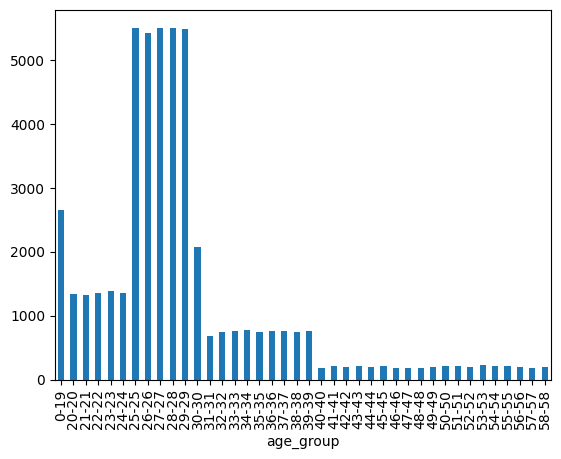

In [ ]:
#Check the age distribution to determine the bin
# pd.cut segment data: https://pandas.pydata.org/docs/reference/api/pandas.cut.html
bins = [0] + [i for i in range(20, 65, 1)]
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)

# Check the distribution of age groups
age_group_distribution = df_clean['age_group'].value_counts().sort_index()

# Display the distribution
age_group_distribution.iloc[:40].plot(kind = 'bar') #plot <58

In [ ]:
#reasonable age range
bins = [18,27,40,100]
age_labels = ['18-27','28-40','41+']

df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=age_labels, right=False)


Clean dataset

In [ ]:
df_clean.to_csv("/credit_data_clean.csv", index=False)

Age vs. Eligible for premium

In [ ]:
freq_age_premium = pd.crosstab(df_clean['age_group'], df_clean['eligible_for_premium'])
freq_age_premium

eligible_for_premium,False,True
age_group,,
18-27,16910,3421
28-40,20381,4959
41+,3840,1125


Age vs. High-Risk Applicant

In [ ]:
#freq_age_risk = pd.crosstab(df_clean['age_group'], df_clean['high_risk'])
#freq_age_risk

Age vs. Default

In [ ]:
freq_age_default = pd.crosstab(df_clean['age_group'], df_clean['default'])
freq_age_default

default,0,1
age_group,,
18-27,15307,5024
28-40,22569,2771
41+,4738,227


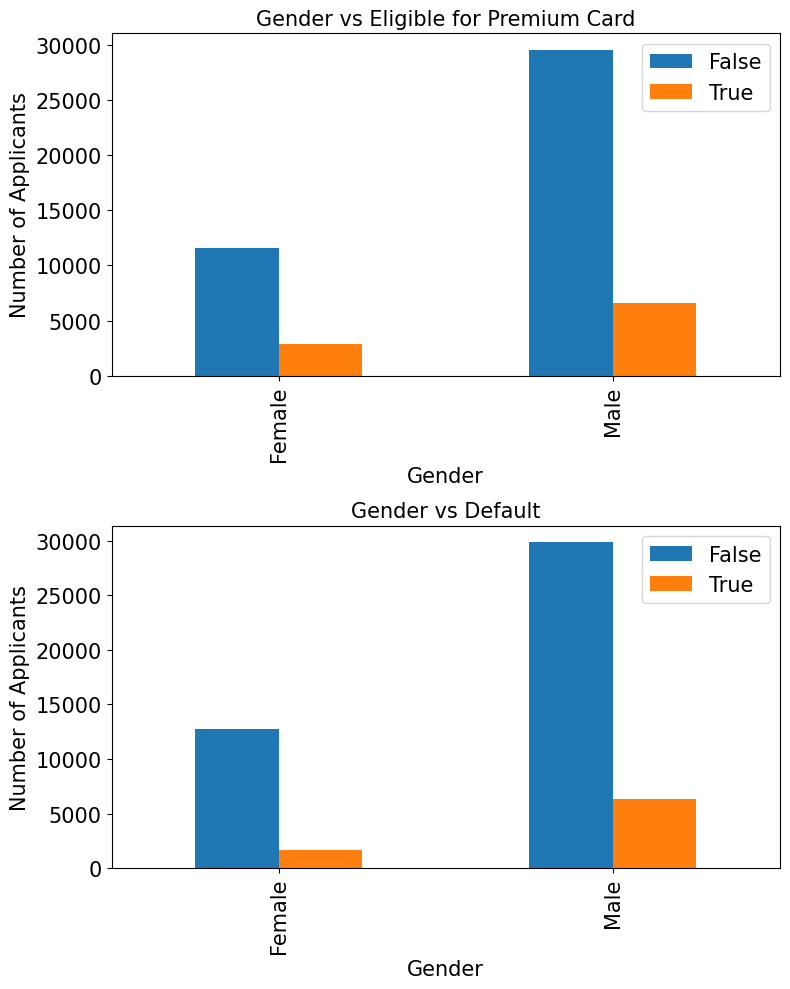

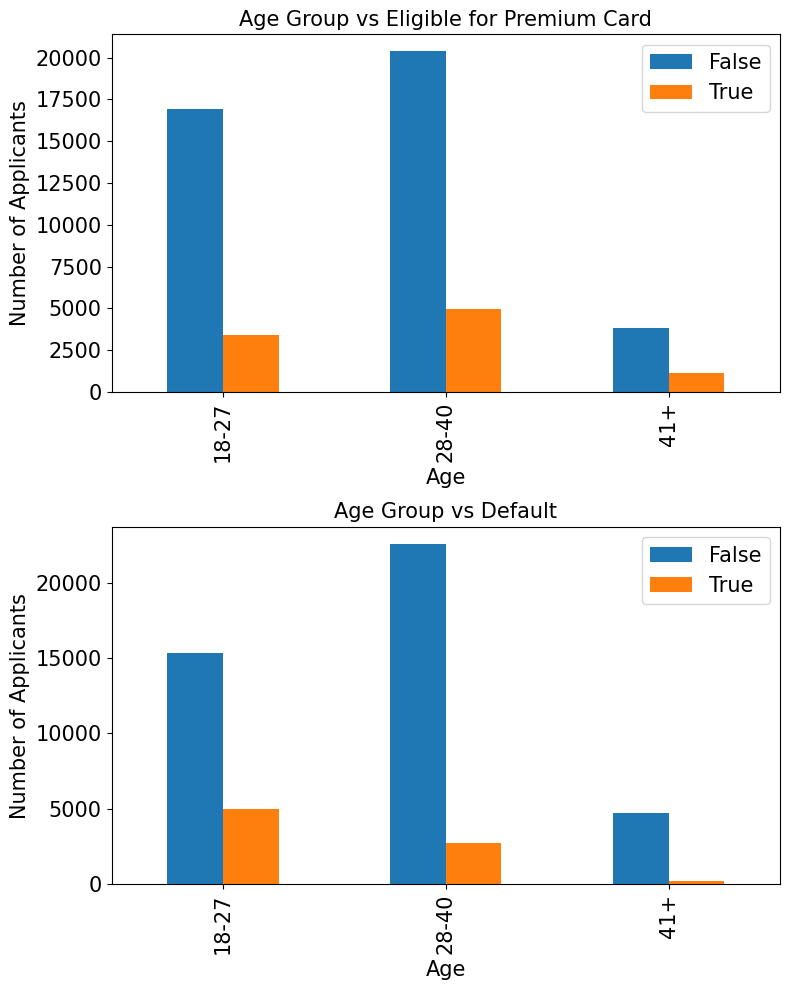

In [ ]:
import matplotlib.pyplot as plt

# Create bar charts for Gender
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

freq_gender_premium.plot(kind='bar', ax=ax[0], fontsize=15)
ax[0].set_title('Gender vs Eligible for Premium Card', fontsize=15)
ax[0].set_ylabel('Number of Applicants', fontsize=15)
ax[0].set_xlabel('Gender', fontsize=15)
ax[0].legend(['False', 'True'], fontsize=15)

freq_gender_default.plot(kind='bar', ax=ax[1], fontsize=15)
ax[1].set_title('Gender vs Default', fontsize=15)
ax[1].set_ylabel('Number of Applicants', fontsize=15)
ax[1].set_xlabel('Gender', fontsize=15)
ax[1].legend(['False', 'True'], fontsize=15)

plt.tight_layout()
plt.show()



# Create bar charts for Age Group
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

freq_age_premium.plot(kind='bar', ax=ax[0], fontsize=15)
ax[0].set_title('Age Group vs Eligible for Premium Card', fontsize=15)
ax[0].set_ylabel('Number of Applicants', fontsize=15)
ax[0].set_xlabel('Age', fontsize=15)
ax[0].legend(['False', 'True'], fontsize=15)

freq_age_default.plot(kind='bar', ax=ax[1], fontsize=15)
ax[1].set_title('Age Group vs Default', fontsize=15)
ax[1].set_ylabel('Number of Applicants', fontsize=15)
ax[1].set_xlabel('Age', fontsize=15)
ax[1].legend(['False', 'True'], fontsize=15)

plt.tight_layout()
plt.show()

Step 3
1. Statistical Parity Difference
2. Equal Opportunity Difference
3. Average Odds Difference
4. Disparate Impact
5. Theil Index

In [ ]:
import numpy as np


# SPD: SPD = P(Ŷ = 1 | A = 0) - P(Ŷ = 1 | A = 1)
# Imagine 100 male and 100 female applying for credit card. If 70 male and 50 female are approved, then:SPD = 70/100−50/100=0.2
def statistical_parity_difference(df, protected_col, privileged_group, predicted_col):
    p_privileged = df[df[protected_col] == privileged_group][predicted_col].mean()# mean = all 1(TP)/all 1+0 (TP+FN) only valid for binary
    p_unprivileged = df[df[protected_col] != privileged_group][predicted_col].mean()
    return p_privileged - p_unprivileged
#TPR = TP/(TP+FN)
def true_positive_rate(df, protected_col, privileged_group, predicted_col, actual_col):
    df_pos = df[df[actual_col] == 1] #all positive. including the one which will be marked to negative (FN)
    privileged_group_df = df_pos[df_pos[protected_col] == privileged_group]
    tpr_privileged = (privileged_group_df[predicted_col] == 1).mean()

    unprivileged_group_df = df_pos[df_pos[protected_col] != privileged_group]
    tpr_unprivileged = (unprivileged_group_df[predicted_col] == 1).mean()
    return tpr_privileged, tpr_unprivileged

# EOD: P(Ŷ = 1 | A = 0, Y = 1) - P(Ŷ = 1 | A = 1, Y = 1)
#Imagine 50 male and 50 female are qualified. If 40 male and 30 female are approved, then: EOD = 40/50−30/50=0.2
def equal_opportunity_difference(df, protected_col, privileged_group, predicted_col, actual_col):
    tpr_privileged, tpr_unprivileged = true_positive_rate(df, protected_col, privileged_group, predicted_col, actual_col)
    return tpr_privileged - tpr_unprivileged

def false_positive_rate(df, protected_col, privileged_group, predicted_col, actual_col):
    df_neg = df[df[actual_col] == 0]
    fpr_privileged = (df_neg[df_neg[protected_col] == privileged_group][predicted_col] == 1).mean()
    fpr_unprivileged = (df_neg[df_neg[protected_col] != privileged_group][predicted_col] == 1).mean()
    return fpr_privileged, fpr_unprivileged

# AOD: 1/2 [(FPR₀ - FPR₁) + (TPR₀ - TPR₁)]
#Suppose for all male and female not actually qualified (true negatives), 10 male and 20 female were incorrectly approved (false positives):
#AOD = 1/2 * ((40/50-30/50)+(10/50-20/50))=0
def average_odds_difference(df, protected_col, privileged_group, predicted_col, actual_col):
    tpr_privileged, tpr_unprivileged = true_positive_rate(df, protected_col, privileged_group, predicted_col, actual_col)
    fpr_privileged, fpr_unprivileged = false_positive_rate(df, protected_col, privileged_group, predicted_col, actual_col)
    return 0.5 * ((tpr_privileged - tpr_unprivileged) + (fpr_privileged - fpr_unprivileged))

# DI: P(Ŷ = 1 | A = 0) / P(Ŷ = 1 | A = 1)
# Easy: DI = 0.7/0.5 = 1.4
def disparate_impact(df, protected_col, privileged_group, predicted_col):
    p_privileged = df[df[protected_col] == privileged_group][predicted_col].mean()
    p_unprivileged = df[df[protected_col] != privileged_group][predicted_col].mean()
    return p_privileged / p_unprivileged

# TI: 1/N ∑ᵢ (ŷᵢ/μ) * log(ŷᵢ/μ)
def theil_index(df, predicted_col):
    y_pred = df[predicted_col]
    y_mean = y_pred.mean()
    theil = (y_pred / y_mean * np.log(y_pred / y_mean)).mean()
    return theil

# Calculate metrics for male

spd_gender_premium = statistical_parity_difference(df_clean, 'gender', 'Male', 'eligible_for_premium')
eod_gender_premium = equal_opportunity_difference(df_clean, 'gender', 'Male', 'eligible_for_premium', 'default')
aod_gender_premium = average_odds_difference(df_clean, 'gender', 'Male', 'eligible_for_premium', 'default')
di_gender_premium = disparate_impact(df_clean, 'gender', 'Male', 'eligible_for_premium')
ti_gender_premium = theil_index(df_clean, 'eligible_for_premium')

# Calculate metrics for 28-40 Group
spd_age_premium = statistical_parity_difference(df_clean, 'age_group', '28-40', 'eligible_for_premium')
eod_age_premium = equal_opportunity_difference(df_clean, 'age_group', '28-40', 'eligible_for_premium', 'default')
aod_age_premium = average_odds_difference(df_clean, 'age_group', '28-40', 'eligible_for_premium', 'default')
di_age_premium = disparate_impact(df_clean, 'age_group', '28-40', 'eligible_for_premium')
ti_age_premium = theil_index(df_clean, 'eligible_for_premium')

# Compile results into a table
results = pd.DataFrame({
    'Fairness Metric': ['SPD', 'EOD', 'AOD', 'DI', 'TI', 'SPD', 'EOD', 'AOD', 'DI', 'TI'],
    'Protected Class': ['Gender', 'Gender', 'Gender', 'Gender', 'Gender', 'Age Group', 'Age Group', 'Age Group', 'Age Group', 'Age Group'],
    'Outcome Variable': ['Eligible for Premium']*10,
    'Value': [spd_gender_premium, eod_gender_premium, aod_gender_premium, di_gender_premium, ti_gender_premium,
              spd_age_premium, eod_age_premium, aod_age_premium, di_age_premium, ti_age_premium]
})
results

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Fairness Metric,Protected Class,Outcome Variable,Value
0,SPD,Gender,Eligible for Premium,-0.015761
1,EOD,Gender,Eligible for Premium,0.000000
2,AOD,Gender,Eligible for Premium,-0.001842
3,DI,Gender,Eligible for Premium,0.920791
4,TI,Gender,Eligible for Premium,8.911749
5,SPD,Age Group,Eligible for Premium,0.015986
6,EOD,Age Group,Eligible for Premium,0.000000
7,AOD,Age Group,Eligible for Premium,-0.003532
8,DI,Age Group,Eligible for Premium,1.088955
9,TI,Age Group,Eligible for Premium,8.911749
